In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
from google.colab import files 
uploaded= files.upload () 

Saving cluster to cluster (1)


**Conjunto de datos**

Se trata de un conjunto de datos reales sobre el estado de los conocimientos de los estudiantes sobre el tema de las máquinas eléctricas de corriente continua. El conjunto de datos se ha obtenido de la tesis doctoral.
User Knowledge Modeling: https://archive-beta.ics.uci.edu/ml/datasets/user+knowledge+modeling 
(En realidad yo lo he modificado un poco para dejarlo más limpio y trabajar más rápido)

**STG** (El grado de tiempo de estudio para los materiales del objeto objetivo)

**SCG** (El grado de número de repetición del usuario para los materiales del objeto objetivo) 

**STR** (El grado de tiempo de estudio del usuario para objetos relacionados con el objeto objetivo)

**LPR** (El desempeño del usuario en el examen de objetos relacionados con el objeto objetivo)

**PEG** (El desempeño del usuario en el examen de objetos objetivo) 

**UNS** (El nivel de conocimiento del usuario Muy bajo: 50; Bajo: 129; Medio: 122; Alto 130)

Vamos a aplicar los algoritmos de clustering para el conjunto de datos, para verificar que efectivamente nuestro algoritmo puede identificar los grupos que ellos han identificado. Cabe resaltar, que habrá que definir una métrica para luego medir con que grado de confianza hemos hecho algoritmos que de verdad clasifican bien.

In [68]:
data=pd.read_csv("cluster") # Para llamar la base de datos. 
data.head(5) # Para mirar solo 5 columnas de la base de datos.

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [69]:
data["UNS"].value_counts() # Observamos una columna en especifico, longitud de datos, tipo da datos. 

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [70]:
# Se aplicaron catergorias numericas a la variable UNS.
data["UNS"]=data["UNS"].replace("Very Low",0) 
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


In [71]:
data["UNS"].value_counts() # Para visualizar la columna deseada y evidenciar los cambios hechos.

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [72]:
data.describe() # Evidenciamos la estadistica descriptiva de cada una de las columnas.

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [73]:
print ("La cantidad de datos es =", len(data)) 
print ("Existen {} datos en el dataset".format (len(data))) # Para imprimir la cantidad o longitud de los datos

La cantidad de datos es = 403
Existen 403 datos en el dataset


In [74]:
data.info() # Para conocer el tipo de datos y evidenciar si hay datos faltantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


In [75]:
pd.DataFrame(np.unique(data['UNS'],return_counts=True),columns=["Muy bajo","Bajo","Medio","Alto"]).T # Observamos la columna nivel de conocimiento del usuario (UNS) con el nombre correspondeinte a cada fila y el valor numerico que lo respresenta, ademas de la frecuencia.

,0,1
Muy bajo,0,50
Bajo,1,129
Medio,2,122
Alto,3,102


In [76]:
data0=data[["STG","SCG","STR","LPR","PEG"]]
data0.head(5)

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


Vamos a aplicar los algoritmos de clustering para el conjunto de datos "data0", los cuales son:
1. K-means
2. Clustering jerárquia
3. DBSCAN
4. Shif t Mean

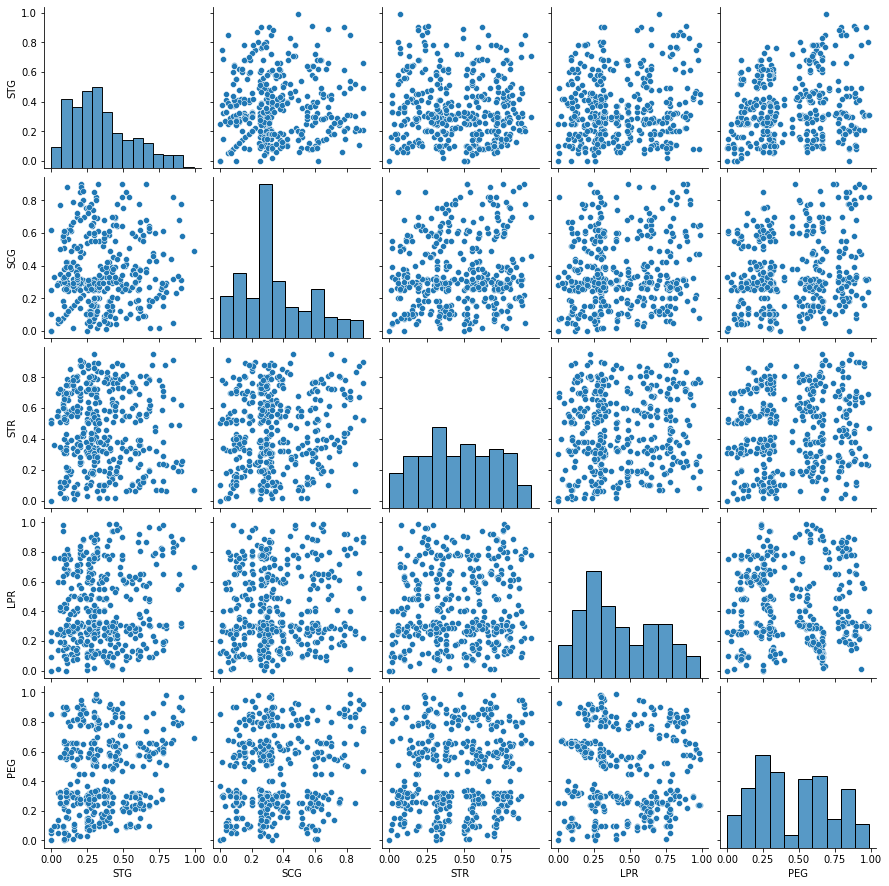

In [77]:
sns.pairplot(data0,aspect=1) # Se esta graficando variable contra variable.
plt.show()

Se evidencia a nivel visual que en algunos graficos, podemos observar el agrupamiento de los datos.

**1. Aplicando K-means:**

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática. 

Tomado de: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html



In [78]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

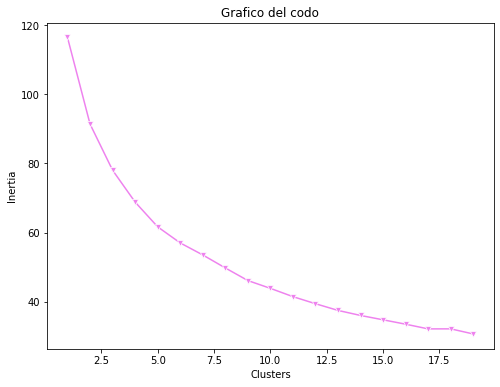

In [79]:
from seaborn import colors
from seaborn.palettes import color_palette
from sklearn.cluster import KMeans

clusters = []
for i in range(1,20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax,marker="v",color="violet")
ax.set_title('Grafico del codo')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

Al observar los cambios en la evolución de la inercia y dado que no se observa tan claro el comportamiento de la misma, se puede afirmar que el número de clusters optimos estara dentro de un rango de 4 a 6. 

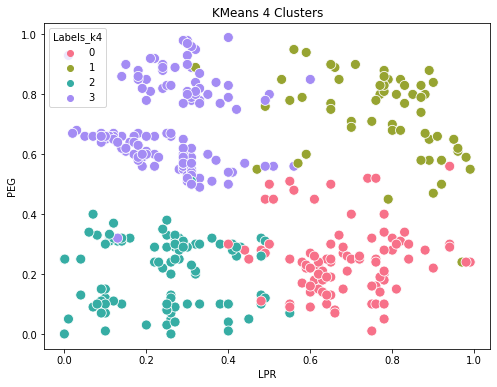

In [80]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('husl', 4), s=100)
plt.title('KMeans 4 Clusters')
plt.show()

Los 4 clusters parecen ser el mejor agrupamiento de los datos (Hasta el momento), teniendo en cuenta que se esta observando un analisis bivariado de LPR y PEG.

LPR (El desempeño del usuario en el examen de objetos relacionados con el objeto objetivo)

PEG (El desempeño del usuario en el examen de objetos objetivo)

**Cluster 0:**  Alto LPR y PEG Bajo

**Cluster 1:** Bajo LPR y PEG Alto

**Cluster 2:** Bajo LPR y PEG Bajo

**Cluster 3:** Alto LPR y PEG Alto

In [117]:
len(data[data['Labels_k4']==0]), len(data[data['Labels_k4']==1]), len(data[data['Labels_k4']==2]), len(data[data['Labels_k4']==3])

(121, 136, 89, 57)

In [127]:
# Error de deteccion 
print (" El error de detección 0 (Muy bajo) es =", np.abs((50-57)/50)*100) 
print (" El error de detección 1 (Bajo) es =", np.abs((122-121)/122)*100)
print (" El error de detección 2 (Medio) es =", np.abs((102-89)/102)*100)
print (" El error de detección 3 (Alto) es =", np.abs((129-136)/129)*100)

 El error de detección 1 (Muy bajo) es = 14.000000000000002
 El error de detección 2 (Bajo) es = 0.819672131147541
 El error de detección 3 (Medio) es = 12.745098039215685
 El error de detección 4 (Alto) es = 5.426356589147287


In [133]:
print("el error de detección promedio para un K-Mean de 4 cluster es=",(np.round((14.000000000000002+0.819672131147541+12.745098039215685+5.426356589147287)/4,2)))

el error de detección promedio para un K-Mean de 4 cluster es= 8.25


Debido a lo anterior, se cuenta con sufieciente evidencia estadística para afirmar que el mejor algoritmo de agrupación no supervisada para la data en estudio es el K-Mean, a juzgar por el grafico y los datos de error de detección. 

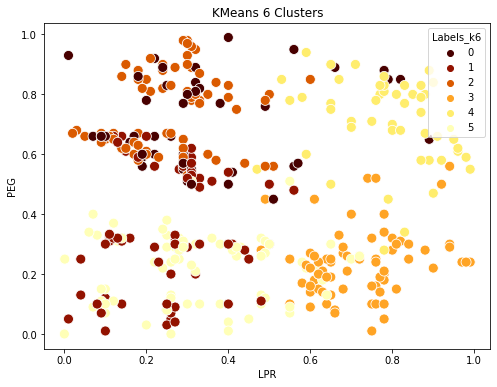

In [107]:
# 6 cluster
km6 = KMeans(n_clusters=6).fit(data0)
data['Labels_k6'] = km6.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('afmhot', 6), s=100)
plt.title('KMeans 6 Clusters')
plt.show()

Parece no ser una buena opcion para el agrupamiento de los datos, ya que evidenciamos visualmente que hay datos intrusos.

**2. Clustering Jerárquico (Aglomerativo)**

El algortimo de clúster jerárquico agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí.

Tomado de: https://estrategiastrading.com/clustering-jerarquico/

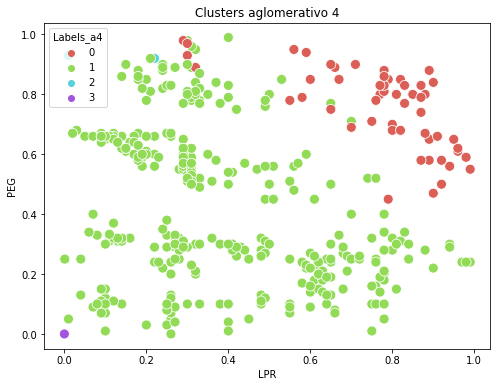

In [111]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('hls', 4), s=100)
plt.title('Clusters aglomerativo 4')
plt.show()

Definitivamente se puede evidenciar que este algorimo no es el adecuado para los datos en estudio, ya que solo toma dos grupos, asi la elección de este clustering no tendria sentido, debido a los grupos que ya estan establecidos en el articulo de estudio.

In [83]:
data[data["Labels_a4"]==3]

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4
145,0.0,0.0,0.0,0.0,0.0,0,2,3,3


In [84]:
len(data[data["Labels_k4"]==3])

135

In [85]:
len(data[data["Labels_a4"]==3])

1

**3. Clustering basado en la densidad (DBSCAN)**

El algoritmo DBSCAN es el método de clustering más rápido, pero solo es apropiado si se puede utilizar una Distancia de búsqueda muy clara, y funciona bien con todos los clústeres potenciales. Para ello, se requiere que todos los clústeres significativos presenten densidades similares. 

Tomado de: https://pro.arcgis.com/es/pro-app/2.8/tool-reference/spatial-statistics/how-density-based-clustering-works.htm#:~:text=La%20herramienta%20Clustering%20basado%20en,cl%C3%BAster%20se%20etiquetan%20como%20ruido.

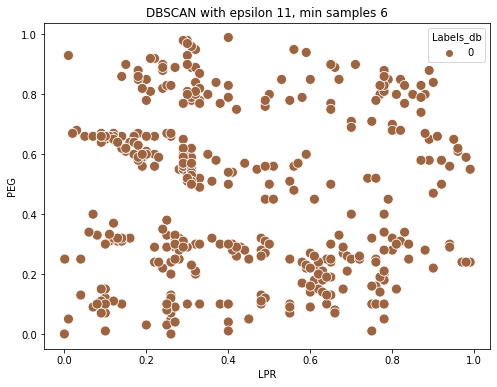

In [113]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('copper', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Se observa que DBSCAN no es adecuado para el analisis de la data, debido a que realiza un solo agrupamiento de los datos. 

**4. Algoritmo Mean Shift**

La agrupación Mean Shift es un algoritmo basado en ventanas deslizantes que intenta encontrar áreas densas de puntos de datos. Es un algoritmo basado en el centroide, lo que significa que el objetivo es localizar los puntos centrales de cada clúster, lo que funciona actualizando a los candidatos para que los puntos centrales sean la media de los puntos dentro de la ventana deslizante.

Tomado: https://aprendeia.com/algoritmos-de-clustering-agrupamiento-aprendizaje-no-supervisado/

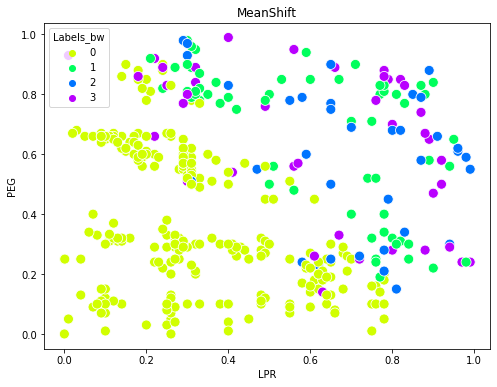

In [116]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# El siguiente ancho de banda se puede detectar automáticamente usando
bandwidth = estimate_bandwidth(data0, quantile=0.0824)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('hsv', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

Podemos evidenciar que los datos no converjen hacia un mismo punto de maxima densidad, lo que provoca que los clusters no encajen en un mismo color, ademas existe un inconveniente y es que la selección del quantil puede ser no trivial. Asi se puede afirmar que este algoritmo es poco aceptado.


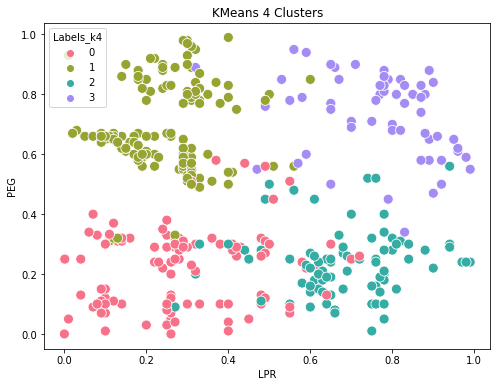

In [100]:
# 4 cluster
# En esta parte se estan probando algunas cualidades del algoritmo tales como "algorithm"
km4 = KMeans(n_clusters=4, algorithm="elkan").fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('husl', 4), s=100)
plt.title('KMeans 4 Clusters')
plt.show()

In [136]:
data1=data.copy() # Realizo una copia de la base de datos original.
data1.head(5)

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw
0,0.00,0.10,0.50,0.26,0.05,0,0,1,1,0,0
1,0.05,0.05,0.55,0.60,0.14,1,2,3,1,0,0
2,0.08,0.18,0.63,0.60,0.85,3,1,2,0,0,1
3,0.20,0.20,0.68,0.67,0.85,3,3,4,0,0,1
4,0.22,0.22,0.90,0.30,0.90,3,1,2,1,0,1


In [141]:
data1["UNS_Kmeans"]=data1["Labels_k4"].replace(0,3) # Para remplazar valores dentro de la data.
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(2,0)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(3,2)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k6,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,0,1,1,0,0,2,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,2,3,1,0,0,0,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,1,2,0,0,1,1,Alto
3,0.20,0.20,0.68,0.67,0.85,3,3,4,0,0,1,2,Alto
4,0.22,0.22,0.90,0.30,0.90,3,1,2,1,0,1,1,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,3,4,0,0,3,2,Alto
399,0.78,0.61,0.71,0.19,0.60,2,1,0,1,0,0,1,Medio
400,0.54,0.82,0.71,0.29,0.77,3,1,0,1,0,3,1,Alto
401,0.50,0.75,0.81,0.61,0.26,2,2,3,1,0,3,0,Medio


In [142]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [143]:
(1 - accuracy_score(data1["UNS_Kmeans"],data1["UNS"]))*100 # Nos permite evidenciar que tan bueno es el modelo de clasificación. 

93.05210918114145

In [140]:
labels_Labels_k4 = dict(zip(data['UNS'].value_counts().index, data['Labels_k4'].value_counts().index)) # Me indica que valores de la data se relacionan. 
labels_Labels_k4

{0: 3, 1: 1, 2: 0, 3: 2}